In [30]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

In [2]:
# path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# op = [pd.read_csv(f, header = 0) for f in all_files]

In [3]:
# def make_good_dfs(df):
#     df = df.T
#     new_header = df.iloc[0] #grab the first row for the header
#     df = df[1:] #take the data less the header row
#     df.columns = new_header #set the header row as the df header
#     return df
# dfs = [make_good_dfs(df) for df in op]

In [4]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_True (7)'
all_files = glob.glob(os.path.join(path, "*.csv"))
ep = [pd.read_csv(f) for f in all_files]
del ep[2]

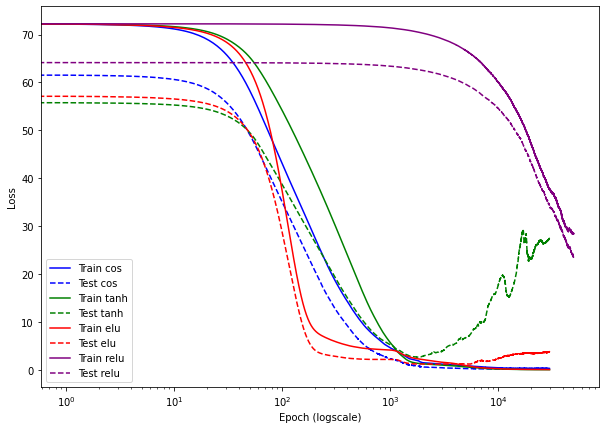

In [5]:
acts = ['cos', 'tanh', 'elu', 'relu']
cols = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(10,7))
for (m, df, cl) in zip(acts, ep, cols):
    plt.plot(df['all_loss_values'], c = cl, label = 'Train ' + m)
    plt.plot(df['all_test_loss_values'], '--', c= cl, label = 'Test ' + m)
    plt.xscale('log')
plt.xlabel('Epoch (logscale)')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
path = 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True'
all_files = glob.glob(os.path.join(path, "*.csv"))
qq = [pd.read_csv(f) for f in all_files]
qq[0]

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,72.242610,88.117584,relu,200,300,72.886345
1,1,72.241800,88.116620,relu,200,300,72.886345
2,2,72.240980,88.115654,relu,200,300,72.886345
3,3,72.240170,88.114685,relu,200,300,72.886345
4,4,72.239360,88.113700,relu,200,300,72.886345
...,...,...,...,...,...,...,...
99995,99995,69.319020,78.558430,relu,200,300,72.886345
99996,99996,69.358894,78.555145,relu,200,300,72.886345
99997,99997,69.343956,78.551796,relu,200,300,72.886345
99998,99998,69.330536,78.549484,relu,200,300,72.886345


In [47]:
all_files

['Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True/results_m_200_act_relu_n_300.csv',
 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True/results_m_200_act_tanh_n_300.csv',
 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True/results_m_200_act_selu_n_300.csv',
 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True/results_m_200_act_elu_n_300.csv',
 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True/results_m_200_act_<function cos at 0x7fbc30572550>_n_300.csv']

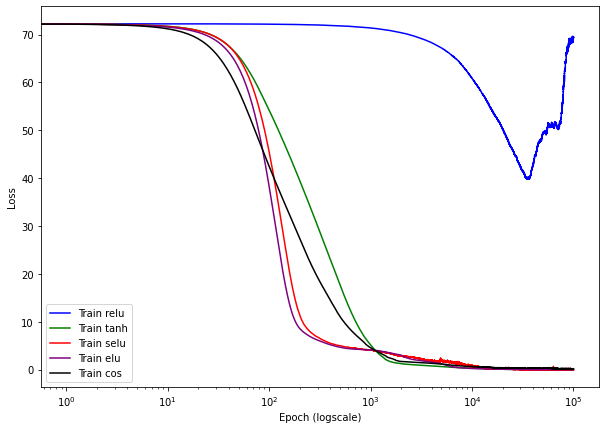

In [65]:
acts = ['relu', 'tanh', 'selu', 'elu', 'cos']
cols = ['blue', 'green', 'red', 'purple', 'black']
plt.figure(figsize=(10,7))
for (m, df, cl) in zip(acts, qq, cols):
    plt.plot(df['all_loss_values'], c = cl, label = 'Train ' + m)
    plt.xscale('log')
plt.xlabel('Epoch (logscale)')
plt.ylabel('Loss')
plt.legend()
plt.show()

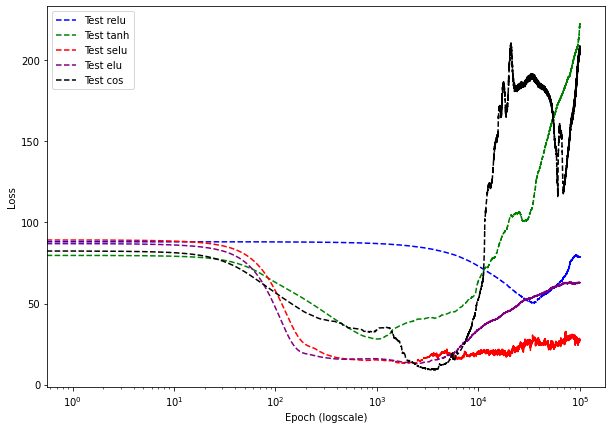

In [67]:
acts = ['relu', 'tanh', 'selu', 'elu', 'cos']
cols = ['blue', 'green', 'red', 'purple', 'black']
plt.figure(figsize=(10,7))
for (m, df, cl) in zip(acts, qq, cols):
    plt.plot(df['all_test_loss_values'], '--', c= cl, label = 'Test ' + m)
    # plt.plot(df['all_test_loss_values'][:-90000], '--', c= cl, label = 'Test ' + m)
    plt.xscale('log')
plt.xlabel('Epoch (logscale)')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
df = pd.concat(qq, axis=0)

# df = pd.get_dummies(df, columns=['activation'])
# np.unique(df['mse'].values, return_index=True)
df.groupby('activation').first()

,Unnamed: 0,all_loss_values,all_test_loss_values,m,n,mse
activation,,,,,,
<function cos at 0x7fbc30572550>,0,72.24261,82.460960,200,300,0.156144
elu,0,72.24261,87.045800,200,300,5.299874
relu,0,72.24261,88.117584,200,300,72.886345
selu,0,72.24261,89.281110,200,300,5.213306
tanh,0,72.24261,79.742160,200,300,77.375510


In [6]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_True (13)'
all_files = glob.glob(os.path.join(path, "*.csv"))
ep = [pd.read_csv(f) for f in all_files]

In [7]:
acts = ['cos', 'tanh', 'elu']
for n, i in enumerate(all_files):
    for activ in acts:
        if activ in i:
            ep[n][activ] = 1
        else:
            ep[n][activ] = 0

In [8]:
ns = ['n_30.','n_90.','n_136.','n_200.','n_300.','n_675.','n_1000.','n_1350.','n_2500.']
for n, i in enumerate(all_files):
    for number in ns:
        if number in i:
            ep[n][number] = 1
        else:
            ep[n][number] = 0

In [9]:
df = pd.concat(ep, axis=0)
df.head(3)

,Unnamed: 0,all_loss_values,all_test_loss_values,cos,tanh,elu,n_30.,n_90.,n_136.,n_200.,n_300.,n_675.,n_1000.,n_1350.,n_2500.
0,0,68.500620,52.666683,1,0,0,0,0,0,0,0,1,0,0,0
1,1,68.431680,52.585890,1,0,0,0,0,0,0,0,1,0,0,0
2,2,68.356476,52.499393,1,0,0,0,0,0,0,0,1,0,0,0


In [10]:
acts = ['cos', 'tanh', 'elu']
cols = ['blue', 'green', 'red']
final_loss_values_cos = []
final_loss_values_tanh = []
final_loss_values_elu = []
final_loss_values_cost = []
final_loss_values_tanht = []
final_loss_values_elut = []
for num in ns:
    final_loss_value_c = df[(df['cos'] ==1) & (df[num] == 1)]['all_loss_values'].iloc[-1]
    final_loss_values_cos.append(final_loss_value_c)
    final_loss_value_ct = df[(df['cos'] ==1) & (df[num] == 1)]['all_test_loss_values'].iloc[-1]
    final_loss_values_cost.append(final_loss_value_ct)

    final_loss_value_t = df[(df['tanh'] ==1) & (df[num] == 1)]['all_loss_values'].iloc[-1]
    final_loss_values_tanh.append(final_loss_value_t)
    final_loss_value_tt = df[(df['tanh'] ==1) & (df[num] == 1)]['all_test_loss_values'].iloc[-1]
    final_loss_values_tanht.append(final_loss_value_tt)

    final_loss_value_e = df[(df['elu'] ==1) & (df[num] == 1)]['all_loss_values'].iloc[-1]
    final_loss_values_elu.append(final_loss_value_e)
    final_loss_value_et = df[(df['elu'] ==1) & (df[num] == 1)]['all_test_loss_values'].iloc[-1]
    final_loss_values_elut.append(final_loss_value_et)


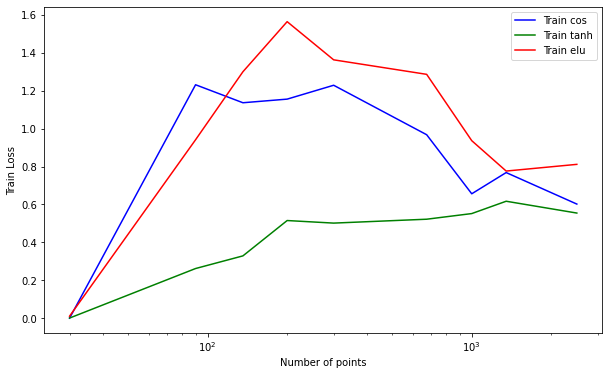

In [11]:
n_num = [30, 90, 136, 200, 300, 675, 1000, 1350, 2500]
plt.figure(figsize=(10,6))
plt.plot(n_num, final_loss_values_cos, label = 'Train cos', c = 'blue')
# plt.plot(n_num, final_loss_values_cost, '--', label = 'Test cos',c = 'blue')
plt.plot(n_num, final_loss_values_tanh, label = 'Train tanh', c='green')
# plt.plot(n_num, final_loss_values_tanht, '--', label = 'Test tanh', c='green')
plt.plot(n_num, final_loss_values_elu, label = 'Train elu', c='red')
# plt.plot(n_num, final_loss_values_elut, '--', label = 'Test elu' ,c='red')
plt.xlabel('Number of points')
plt.ylabel('Train Loss')
plt.xscale('log')
plt.legend()
plt.show()

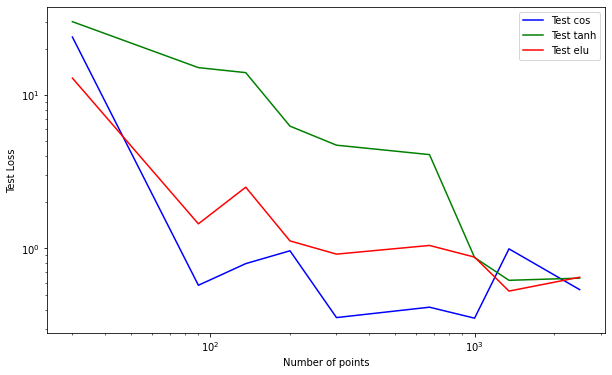

In [18]:
plt.figure(figsize=(10,6))
plt.plot(n_num, final_loss_values_cost, label = 'Test cos',c = 'blue')
plt.plot(n_num, final_loss_values_tanht,  label = 'Test tanh', c='green')
plt.plot(n_num, final_loss_values_elut,  label = 'Test elu' ,c='red')
plt.xlabel('Number of points')
plt.ylabel('Test Loss')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [13]:
# path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (7)'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# all_ms = [pd.read_csv(f) for f in all_files]
# df = pd.concat(all_ms, axis=0)
# df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n
0,0,72.242610,71.255775,<function cos at 0x7fabfa70a710>,80,300
1,1,59.210262,59.059890,<function cos at 0x7fabfa70a710>,80,300
2,2,49.500454,49.518700,<function cos at 0x7fabfa70a710>,80,300
3,3,42.083683,41.969830,<function cos at 0x7fabfa70a710>,80,300
4,4,36.319690,35.942024,<function cos at 0x7fabfa70a710>,80,300
...,...,...,...,...,...,...
9995,9995,1.283819,0.616905,<function cos at 0x7fabfa70a710>,160,300
9996,9996,1.283775,0.616886,<function cos at 0x7fabfa70a710>,160,300
9997,9997,1.283731,0.616867,<function cos at 0x7fabfa70a710>,160,300
9998,9998,1.283687,0.616848,<function cos at 0x7fabfa70a710>,160,300


In [14]:
# df_ms = pd.get_dummies(df, columns=['m'])

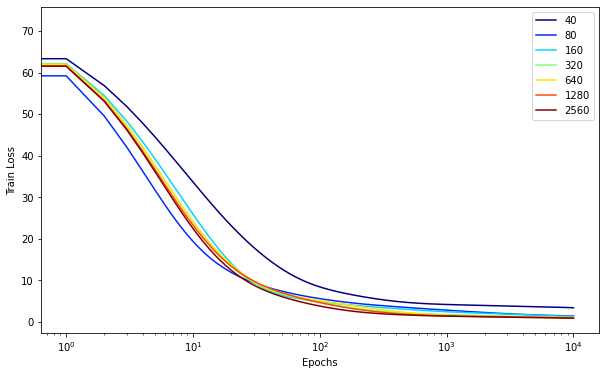

In [15]:
# ms = ['m_40', 'm_80', 'm_160', 'm_320', 'm_640', 'm_1280', 'm_2560']
# color = cm.jet(np.linspace(0, 1, len(ms)))

# plt.figure(figsize=(10,6))
# for m, cl in zip(ms, color):
#     plt.plot(df_ms[df_ms[m] == 1]['all_loss_values'], label = m[2:], c = cl)
#     # plt.plot(df_ms[df_ms[m] == 1]['all_test_loss_values'], label = m[2:], c= cl)
# plt.xscale('log')
# plt.legend()
# plt.xlabel('Epochs')
# plt.ylabel('Train Loss')
# plt.show()

In [16]:
# ms_nums = [40, 80, 160, 320, 640, 1280, 2560]

# all_loss = [df_ms[df_ms[m] ==1]['all_loss_values'].iloc[-1] for m in ms]
# all_test_loss = [df_ms[df_ms[m] ==1]['all_test_loss_values'].iloc[-1] for m in ms]

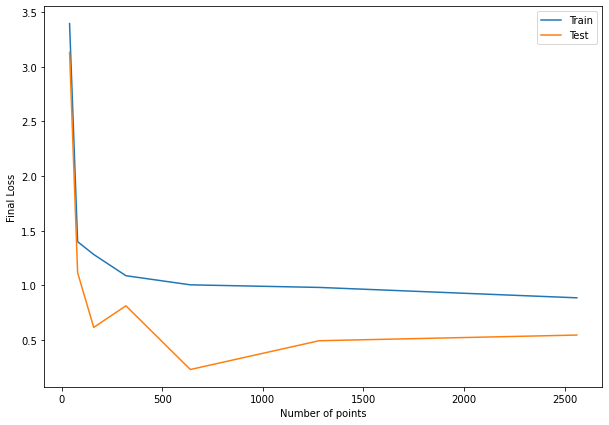

In [17]:
# plt.figure(figsize=(10,7))
# plt.plot(ms_nums, all_loss, label = 'Train')
# plt.plot(ms_nums, all_test_loss, label = 'Test')
# # plt.xscale('log')
# plt.legend()
# plt.xlabel('Number of points')
# plt.ylabel('Final Loss')
# plt.show()


In [23]:
path = 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_False'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_ms = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_ms, axis=0)
df_ms = pd.get_dummies(df, columns=['m'])
df_ms

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,n,mse,m_40,m_80,m_160,m_320,m_640,m_1280,m_2560,m_5120
0,0,72.242610,74.720276,<function cos at 0x7fabe871bca0>,300,0.641884,0,0,0,0,0,1,0,0
1,1,62.123295,67.430430,<function cos at 0x7fabe871bca0>,300,0.641884,0,0,0,0,0,1,0,0
2,2,54.225440,61.789200,<function cos at 0x7fabe871bca0>,300,0.641884,0,0,0,0,0,1,0,0
3,3,47.932587,57.333130,<function cos at 0x7fabe871bca0>,300,0.641884,0,0,0,0,0,1,0,0
4,4,42.821420,53.745117,<function cos at 0x7fabe871bca0>,300,0.641884,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2.811853,32.034490,<function cos at 0x7fabe871bca0>,300,2.407628,1,0,0,0,0,0,0,0
9996,9996,2.811789,32.036682,<function cos at 0x7fabe871bca0>,300,2.407628,1,0,0,0,0,0,0,0
9997,9997,2.811725,32.038895,<function cos at 0x7fabe871bca0>,300,2.407628,1,0,0,0,0,0,0,0
9998,9998,2.811662,32.041092,<function cos at 0x7fabe871bca0>,300,2.407628,1,0,0,0,0,0,0,0


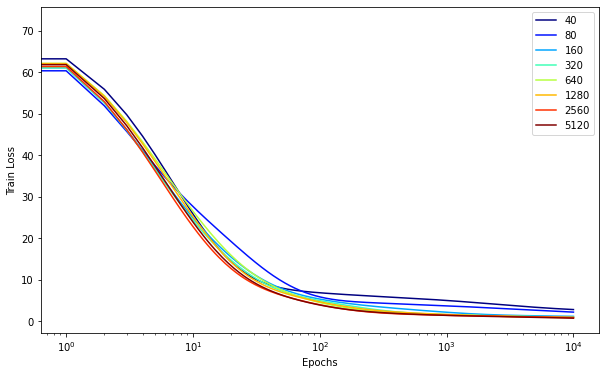

In [24]:
ms = ['m_40', 'm_80', 'm_160', 'm_320', 'm_640', 'm_1280', 'm_2560', 'm_5120']
color = cm.jet(np.linspace(0, 1, len(ms)))

plt.figure(figsize=(10,6))
for m, cl in zip(ms, color):
    plt.plot(df_ms[df_ms[m] == 1]['all_loss_values'], label = m[2:], c = cl)
    # plt.plot(df_ms[df_ms[m] == 1]['all_test_loss_values'], label = m[2:], c= cl)
plt.xscale('log')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

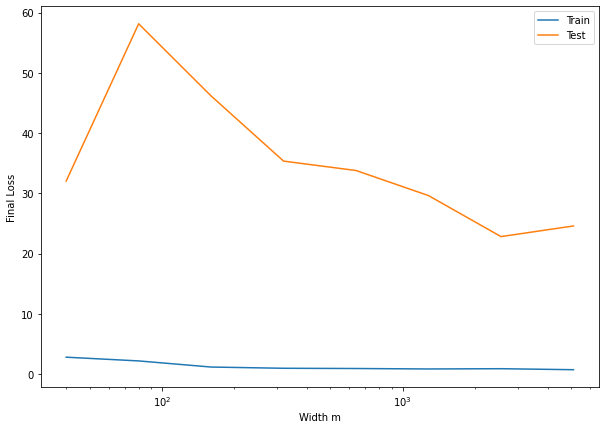

In [29]:
ms_nums = [40, 80, 160, 320, 640, 1280, 2560, 5120]

all_loss = [df_ms[df_ms[m] ==1]['all_loss_values'].iloc[-1] for m in ms]
all_test_loss = [df_ms[df_ms[m] ==1]['all_test_loss_values'].iloc[-1] for m in ms]

plt.figure(figsize=(10,7))
plt.plot(ms_nums, all_loss, label = 'Train')
plt.plot(ms_nums, all_test_loss, label = 'Test')
plt.xscale('log')
plt.legend()
plt.xlabel('Width m')
plt.ylabel('Final Loss')
plt.show()

In [117]:
path = 'Machine_Experiments/Experiments/Lyapunov_eq_van_der_pool_2d_train_True (1)'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_n_act = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_n_act, axis=0)
df.head(3)

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,68.500610,88.39453,elu,200,675,0.941643
1,1,68.428246,88.31046,elu,200,675,0.941643
2,2,68.353320,88.22287,elu,200,675,0.941643


In [118]:
df = df.replace({'<function cos at 0x7f558fcd05e0>': 'cos'})

In [120]:
all_n = np.sort(df['n'].unique())
all_act = df['activation'].unique()
all_act

array(['elu', 'selu', 'tanh', 'cos'], dtype=object)

In [121]:
# df = pd.get_dummies(df, columns=['activation', 'n'])

In [122]:
# df.groupby('n_90').last()

In [123]:
# import seaborn as sns
# sns.lineplot(df, x = 'n', y='all_loss_values', hue = 'activation')

In [124]:
# df.groupby('n').last()

In [125]:
# df[df['n'] ==675].groupby('activation').last()

In [133]:
df_small = df.groupby(['activation', 'n']).last().reset_index()
# pd.get_dummies(df_small, columns=['activation'])
df_small

,activation,n,Unnamed: 0,all_loss_values,all_test_loss_values,m,mse
0,cos,90,9999,0.117587,137.473040,200,36.778446
1,cos,300,9999,0.612129,71.685330,200,0.470490
2,cos,675,9999,0.533842,51.517563,200,0.460959
3,cos,1250,9999,0.403290,35.012920,200,0.434739
4,cos,2500,9999,0.334332,37.151900,200,0.437159
5,cos,4000,9999,0.277620,40.194310,200,0.378811
6,cos,8000,9999,0.317157,38.074383,200,0.470082
7,elu,90,9999,0.002353,44.026524,200,10.762651
8,elu,300,9999,0.343660,29.583822,200,3.672822
9,elu,675,9999,0.571635,13.642881,200,0.941643


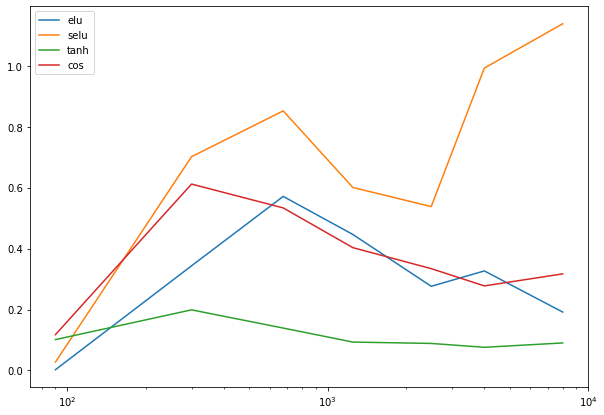

In [134]:
plt.figure(figsize=(10,7))
for act in all_act:
    temp_df = df_small[df_small['activation'] == act]
    plt.plot(temp_df['n'], temp_df['all_loss_values'], label = act)
plt.xscale('log')
plt.legend()
plt.show()

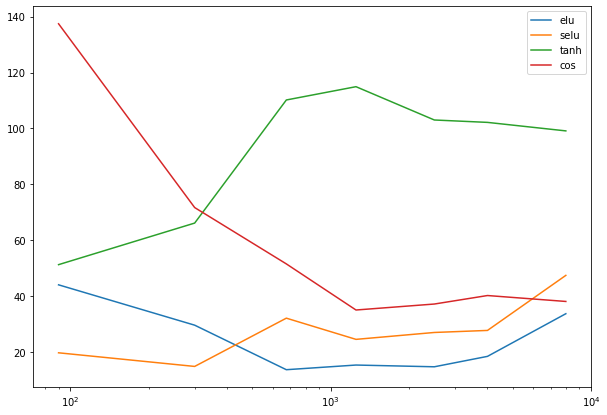

In [135]:
plt.figure(figsize=(10,7))
for act in all_act:
    temp_df = df_small[df_small['activation'] == act]
    plt.plot(temp_df['n'], temp_df['all_test_loss_values'], label = act)
plt.xscale('log')
plt.legend()
plt.show()